In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.utils import resample


In [2]:
data = pd.read_csv(r'D:\z Data Science\Assignment\Assignment\Assignment 13\forestfires.csv')

In [3]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
data['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [5]:
data_1=data.drop(['month','day'],axis=1)

In [6]:
df_corr=data_1.corr()

In [7]:
data_1.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
data_1.shape

(517, 29)

In [9]:
print("Total number of labels: {}".format(data_1.shape[0]))
print("Number of small: {}".format(data_1[data_1.size_category == 'small'].shape[0]))
print("Number of large: {}".format(data_1[data_1.size_category == 'large'].shape[0]))

Total number of labels: 517
Number of small: 378
Number of large: 139


In [10]:
data_1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data_1.duplicated().sum()

8

In [12]:
data_1.drop_duplicates( keep = False, inplace = True)

In [13]:
data_1.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [14]:
data_1.shape

(501, 29)

#There are 29 features and 517 instances.

In [15]:
data_1.values

array([[86.2, 26.2, 94.3, ..., 0, 0, 'small'],
       [90.6, 35.4, 669.1, ..., 1, 0, 'small'],
       [90.6, 43.7, 686.9, ..., 1, 0, 'small'],
       ...,
       [81.6, 56.7, 665.6, ..., 0, 0, 'large'],
       [94.4, 146.0, 614.7, ..., 0, 0, 'small'],
       [79.5, 3.0, 106.7, ..., 0, 0, 'small']], dtype=object)

In [16]:
X=data_1.iloc[:, :-1]
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
from sklearn.preprocessing import LabelEncoder
y=data_1.iloc[:,-1]

# Encode label category
# small-> 1
# large -> 0

size_encoder = LabelEncoder()
y = size_encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [18]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=42)

print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (340, 28)
y train size:  (340,)
X test size:  (161, 28)
y test size:  (161,)


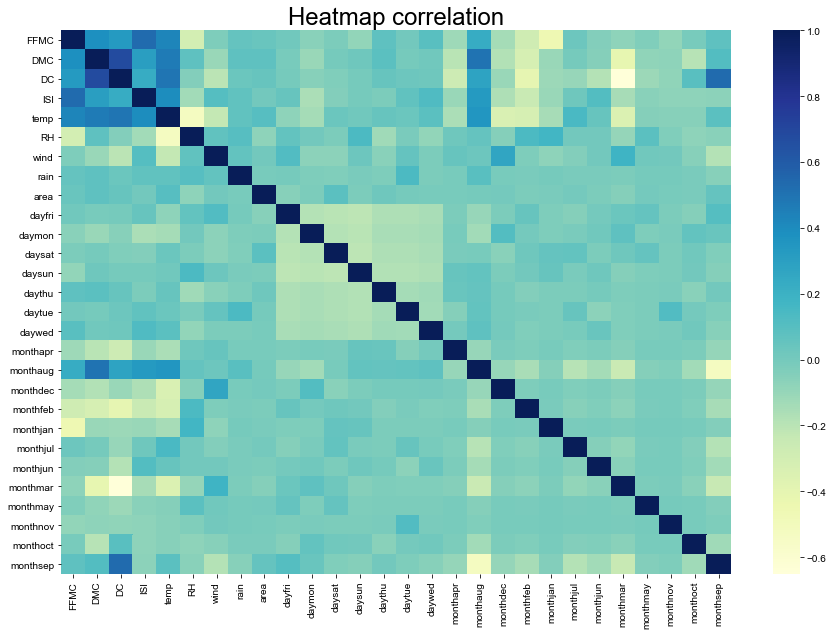

In [20]:
import seaborn
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [21]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7515527950310559


In [22]:
#Linear Kernal
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8633540372670807


In [23]:
#Default RBF keneral
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7515527950310559


We can conclude from above that svm by default uses rbf kernel as a parameter for kernel

In [24]:
#svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7515527950310559


Polynomial kernel is performing poorly.The reason behind this maybe it is overfitting the training dataset

In [25]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.7254902 0.92      1.        1.        0.8       0.86      0.9
 0.9       0.84      0.9      ]


In [26]:
print(scores.mean())

0.8845490196078432


In [27]:
#cv on polynomial kernal
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.74509804 0.76       0.74       0.72       0.84       0.7
 0.66       0.76       0.68       0.7       ]


In [28]:
print(scores.mean())

0.7305098039215686


In [29]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)   

[0.8845490196078432, 0.9263921568627451, 0.942313725490196, 0.944235294117647, 0.9482745098039216, 0.9442745098039215, 0.946235294117647, 0.9522745098039215, 0.9562745098039216, 0.9562745098039216, 0.9542745098039214, 0.9562745098039216, 0.9562745098039216, 0.9582352941176471, 0.9582352941176471, 0.9601960784313726, 0.9621960784313724, 0.9581960784313726, 0.962235294117647, 0.9642352941176469, 0.9641960784313724, 0.9661960784313723, 0.9681960784313727, 0.9661960784313723, 0.9681960784313727]


Text(0, 0.5, 'Cross-Validated Accuracy')

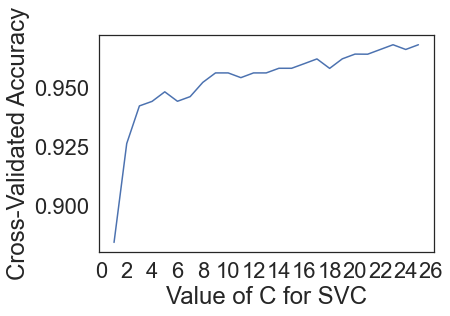

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [31]:
sc = StandardScaler()
sc.fit(X_train)

X_train_std= sc.transform(X_train)
X_test_std= sc.transform(X_test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


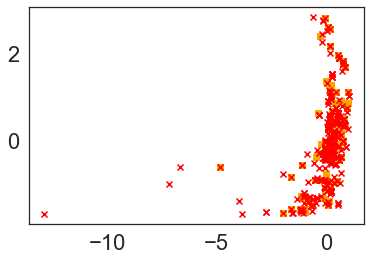

In [32]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s','x','o')
colors = ('orange','red','blue')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl,0], y=X[y == cl , 1],
               c=cmap(idx), marker=markers[idx], label=cl)

In [33]:
from sklearn.svm import SVC
svm_model= SVC()

In [34]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [35]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [36]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.7470588235294118


In [37]:
print(model_svm.best_params_)

{'C': 0.1, 'degree': 2, 'gamma': 0.03, 'kernel': 'poly'}


In [38]:
y_pred= model_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 72.67080745341616


array([[  2,  44],
       [  0, 115]], dtype=int64)

In [39]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1],
                     'C': [1]},
                    {'kernel': ['linear'], 'C': [1]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='precision')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1], 'gamma': [0.1], 'kernel': ['rbf']},
                         {'C': [1], 'kernel': ['linear']}],
             scoring='precision')

In [40]:
from sklearn.metrics import precision_score, accuracy_score
y_true, y_pred = y_test, clf.predict(X_test)
print('precision on the evaluation set: ', precision_score(y_true, y_pred))
print('accuracy on the evaluation set: ', accuracy_score(y_true, y_pred))

precision on the evaluation set:  0.8394160583941606
accuracy on the evaluation set:  0.8633540372670807


# Salary Data

In [41]:
data_raw = pd.read_csv(r'D:\z Data Science\Assignment\Assignment\Assignment 13\SalaryData_Test.csv')

In [42]:
data_raw

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [43]:
data_raw.duplicated().sum()

930

In [44]:
data_raw.drop_duplicates( keep = False, inplace = True)

In [45]:

for i in data_raw.columns:
    if data_raw[i].dtypes == 'object':
        print(i)
        print(data_raw[i].unique())
        print('__________________________________________________________________________')

workclass
[' Private' ' Local-gov' ' Self-emp-not-inc' ' Federal-gov' ' State-gov'
 ' Self-emp-inc' ' Without-pay']
__________________________________________________________________________
education
[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' 5th-6th' ' Assoc-voc' ' 9th'
 ' Doctorate' ' 12th' ' 1st-4th' ' Preschool']
__________________________________________________________________________
maritalstatus
[' Never-married' ' Married-civ-spouse' ' Widowed' ' Separated'
 ' Divorced' ' Married-spouse-absent' ' Married-AF-spouse']
__________________________________________________________________________
occupation
[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces']
______________________________________________________________

In [46]:
data_greater = data_raw[data_raw['Salary'] == ' >50K']
data_less = data_raw[data_raw['Salary'] == ' <=50K']

In [47]:
data_greater['Salary'] = 1
data_greater

<ipython-input-47-634d98f41040>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_greater['Salary'] = 1


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,1
11,48,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15033,60,Private,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,1
15035,38,Private,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,1
15036,43,Local-gov,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,50,United-States,1
15042,40,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,55,United-States,1


In [48]:
data_less['Salary'] = 0
data_less

<ipython-input-48-9f0e7f8b89ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_less['Salary'] = 0


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15054,48,Local-gov,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,0
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0


In [49]:
data_res_greater = resample(data_greater, n_samples = 1000, random_state = 42, replace = False)
data_res_less = resample(data_less, n_samples = 1000, replace = False)

In [50]:
data_downsampled = pd.concat([data_res_greater, data_res_less])
data_downsampled

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
14589,37,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,1
2649,30,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,1
14150,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,1
4781,60,Private,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,1
1304,45,State-gov,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,55,Private,HS-grad,9,Widowed,Tech-support,Not-in-family,White,Male,0,0,40,United-States,0
1499,64,Private,HS-grad,9,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,40,United-States,0
14552,45,Self-emp-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,0
1746,58,Private,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,48,United-States,0


In [51]:
data_test = pd.read_csv(r'D:\z Data Science\Assignment\Assignment\Assignment 13\SalaryData_Test.csv')
data_test['Salary'] = data_test['Salary'].map({' <=50K' : 0, ' >50K' : 1})
data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [52]:
data_jumbo = pd.concat([data_downsampled, data_test])
data_jumbo

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
14589,37,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,1
2649,30,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,1
14150,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,1
4781,60,Private,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,1
1304,45,State-gov,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [53]:
data_with_dummies = pd.get_dummies(data_jumbo)
data_with_dummies

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
14589,37,12,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2649,30,9,0,0,45,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14150,38,13,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4781,60,4,0,0,50,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1304,45,11,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
data_test = data_with_dummies.iloc[2000:]
data_test

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
data_train = data_with_dummies.iloc[0:2000,:]
data_train

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
14589,37,12,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2649,30,9,0,0,45,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14150,38,13,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4781,60,4,0,0,50,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1304,45,11,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,55,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1499,64,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14552,45,9,0,0,45,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1746,58,3,0,0,48,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
#Optimizing SVM

In [57]:
y = data_train['Salary']
X = data_train.drop('Salary', axis = 1)
X_scaled = scale(X)

In [58]:
param_grid = {'kernel' : ['rbf'], 'gamma' : [1, 0.1, 0.001, 0.0001, 0.00001], 'C' : [0.5, 1, 100]}
optimal = GridSearchCV(SVC(), param_grid, cv = 10)
optimal.fit(X_scaled, y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.5, 1, 100],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']})

In [59]:
optimal.best_params_ , optimal.best_score_

({'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}, 0.792)

In [60]:
vector = SVC(C = 100, gamma = 0.001)
vector.fit(X_scaled, y)

SVC(C=100, gamma=0.001)

In [61]:
y_test = data_test['Salary']
X_test = data_test.drop('Salary', axis = 1)
X_test_scaled = scale(X_test)

In [62]:

predictions = vector.predict(X_test_scaled)
np.mean(predictions == y_test)

0.7356573705179282

In [63]:
confusion_matrix(y_test, predictions)

array([[7653, 3707],
       [ 274, 3426]], dtype=int64)

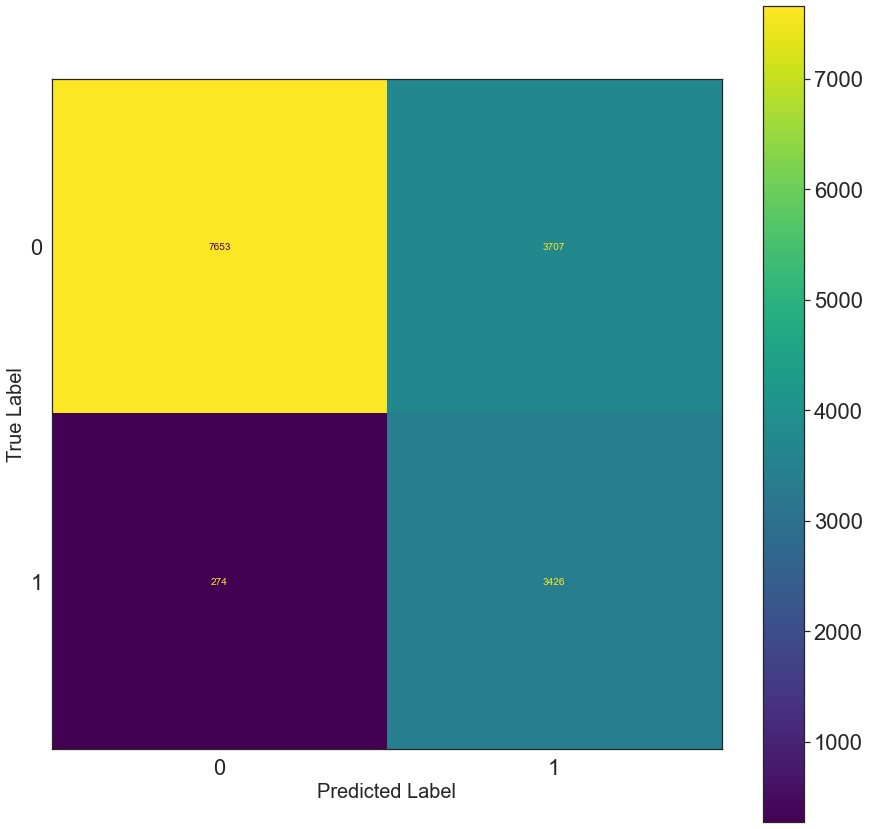

In [64]:
fig , ax = plt.subplots(figsize = (15,15))
plot_confusion_matrix(vector, X_test_scaled, y_test, ax = ax)
ax.set_xlabel('Predicted Label', fontsize = 20)
ax.set_ylabel('True Label', fontsize = 20)
plt.show()